In [1]:
import pandas as pd 
import numpy as np
import re

In [88]:
def create_common_df(id_):
    try:
        cols = ['NaturalLanguageID', 'ProgrammingLanguageName', 'RepoID', 'SourceID', 'CommentID', 'comment', 'label']
        df = pd.read_csv('.\Data\Common\OutDataCommon{}.txt'.format(id_), sep='\t', lineterminator='\r', header=None)
        df.columns = cols
        df = df.drop(['NaturalLanguageID', 'ProgrammingLanguageName', 'RepoID', 'SourceID', 'CommentID'],axis=1)
        return df
    except:
        with open('.\Data\Common\OutDataCommon{}.txt'.format(id_), "r", encoding="utf-8",  newline="\r\n") as source:
            for line in source:
                line = line.replace("\n", "")
                part = line.split("\t")
                if len(part) != 7:
                    print('POPRAVITI .TXT')
                    print(part)

In [89]:
df1 = create_common_df(1)
df2 = create_common_df(2)
df3 = create_common_df(3)
df4 = create_common_df(4)

In [90]:
df4.shape

(557, 2)

In [46]:
pd.set_option('display.max_rows', 100)

In [36]:
merged = df1.merge(df2, how='left', on='comment', suffixes=('_1', '_2')).merge(df3, how='left', on='comment').merge(df4, how='left', on='comment')

In [37]:
cols = merged.columns.values
cols[3] = 'label_3'
cols[4] = 'label_4'
merged.columns = cols

In [39]:
merged.drop_duplicates(subset ="comment", keep = False, inplace = True)
merged = merged.dropna()
merged = merged.reset_index(drop=True)

In [44]:
hits = [0]*merged.shape[0]

for i in range(merged.shape[0]):
    if merged.loc[i]['label_1'] == merged.loc[i]['label_2']:
        hits[i] += 1
    if merged.loc[i]['label_1'] == merged.loc[i]['label_3']:
        hits[i] += 1
    if merged.loc[i]['label_1'] == merged.loc[i]['label_4']:
        hits[i] += 1
    if merged.loc[i]['label_2'] == merged.loc[i]['label_3']:
        hits[i] += 1
    if merged.loc[i]['label_2'] == merged.loc[i]['label_4']:
        hits[i] += 1
    if merged.loc[i]['label_3'] == merged.loc[i]['label_4']:
        hits[i] += 1       

# 6 svi pogodjeni
# 3 kad su 3 ista i 1 razlicit
# 2 kad su po 2 ista
# 1 kad su 2 ista i 2 razlicita
# 0 svi razliciti

In [45]:
hits

[6,
 3,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 3,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 6,
 6,
 6,
 6,
 3,
 3,
 6,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 6,
 6,
 6,
 3,
 6,
 3,
 3,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [55]:
all_same = 0
three_same_one_diff = 0
two_same_two_diff = 0
two_same_one_diff_one_diff = 0
all_diff = 0

for j,i in enumerate(hits):
    if i == 6:
        all_same += 1 
    if i == 3:
        three_same_one_diff += 1
    if i == 2:
        two_same_two_diff += 1
        
    if i == 1:
        two_same_one_diff_one_diff += 1
    if i == 0:
        all_diff += 1
        print(merged.loc[j])

comment     \n Napisati program koji iz datoteke 'input.t...
label_1                                                 ToDo
label_2                                              General
label_3                                    Functional-Module
label_4                                    Functional-Inline
Name: 450, dtype: object


In [53]:
print('All same: ', all_same)
print('Three same, one different: ', three_same_one_diff)
print('Two same, two different (same to one another): ', two_same_two_diff)
print('Two same, two different (different from one another): ', two_same_one_diff_one_diff)
print('All different: ', all_diff)
print('Total comments: ', merged.shape[0])

All same:  354
Three same, one different:  95
Two same, two different (same to one another):  12
Two same, two different (different from one another):  14
All different:  1
Total comments:  476


In [54]:
print('All same (%): ', round(all_same/merged.shape[0]*100))
print('Three same, one different (%): ',  round(three_same_one_diff/merged.shape[0]*100))
print('Two same, two different (same to one another) (%): ',  round(two_same_two_diff/merged.shape[0]*100))
print('Two same, two different (different from one another) (%): ',  round(two_same_one_diff_one_diff/merged.shape[0]*100))
print('All different (%): ',  round(all_diff/merged.shape[0]*100))

All same (%):  74
Three same, one different (%):  20
Two same, two different (same to one another) (%):  3
Two same, two different (different from one another) (%):  3
All different (%):  0


In [57]:
hits = np.zeros((merged.shape[0],6))

for i in range(merged.shape[0]):
    if merged.loc[i]['label_1'] == merged.loc[i]['label_2']:
        hits[i][0] += 1
    if merged.loc[i]['label_1'] == merged.loc[i]['label_3']:
        hits[i][1] += 1
    if merged.loc[i]['label_1'] == merged.loc[i]['label_4']:
        hits[i][2] += 1
    if merged.loc[i]['label_2'] == merged.loc[i]['label_3']:
        hits[i][3] += 1
    if merged.loc[i]['label_2'] == merged.loc[i]['label_4']:
        hits[i][4] += 1
    if merged.loc[i]['label_3'] == merged.loc[i]['label_4']:
        hits[i][5] += 1

In [59]:
hits

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [58]:
print('Procenat podudarnosti izmedju Laze i Matije: ', round(hits[:,0].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Laze i Mateje: ', round(hits[:,1].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Laze i Munje: ', round(hits[:,2].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Matije i Mateje: ', round(hits[:,3].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Matije i Munje: ', round(hits[:,4].sum()/merged.shape[0]*100))
print('Procenat podudarnosti izmedju Mateje i Munje: ', round(hits[:,5].sum()/merged.shape[0]*100))

Procenat podudarnosti izmedju Laze i Matije:  87.0
Procenat podudarnosti izmedju Laze i Mateje:  93.0
Procenat podudarnosti izmedju Laze i Munje:  83.0
Procenat podudarnosti izmedju Matije i Mateje:  89.0
Procenat podudarnosti izmedju Matije i Munje:  78.0
Procenat podudarnosti izmedju Mateje i Munje:  83.0


## Priprema common podataka za dodavanje celokupnim podacima

In [156]:
cols = ['NaturalLanguageID', 'ProgrammingLanguageName', 'RepoID', 'SourceID', 'CommentID', 'comment', 'label']
df = pd.read_csv('.\Data\Common\OutDataCommon1.txt', sep='\t', lineterminator='\r', header=None)
df.columns = cols

In [157]:
for i in range(df.shape[0]):
    if df['NaturalLanguageID'][i][0] == '\n':
        df['NaturalLanguageID'][i] = df['NaturalLanguageID'][i][1:]

In [158]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\Hotel.java,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,klik na dugme guest na pocetku programa \n,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\Hotel.java,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,prikaz slobodnih soba za izabrani tip priliko...,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\Hotel.java,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,gost notifikuje adminu da zeli check out iz h...,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\MyConnector...,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,\n * Sefer Kuduzoviæ \n,General
4,SR,Java,BILD-IT-Advanced-master,src\miniProjekat_05_02_2016\BattleShip.java,BILD-IT-Advanced-master/src\miniProjekat_05_02...,pravimo board velicine 5 * 5 \n,Functional-Inline
...,...,...,...,...,...,...,...
587,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun.setOriginalnaUkupnaCena(racunDTO.getOrig...,Code
588,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Rečnik koji se koristi za normalizovanje...,Functional-Inline
589,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Očuvava kapitalizaciju na početku rečenice \n...,Functional-Inline
590,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Ako se radi o karakteru koje spada u eng...,Functional-Inline


In [159]:
for i in range(merged.shape[0]):
    # dodeljuje se najverovatnija vrednost zajednickim komentarima
    if merged['comment'][i] in df.comment.values:
        arr = np.zeros(4) # niz u koji ce se upisati koliko se koji label pojavljuje
        for j in range(4):
            # za prvi label se prebroji koliko puta se pojavio i medju ostalim label-ima, i tako dalje za 2, 3, 4.
            arr[j] = merged.loc[i].str.count(merged.loc[i]['label_{}'.format(j+1)]).sum()
        # index u df-u gde je komentar jednak komentaru koji razmatramo u merged tabeli
        idx = df.loc[df['comment'] == merged['comment'][i]].index.values[0] 
        # za prethodno pronadjen red u data frame-u dodljuje se najcesci label
        df.loc[idx]['label'] = merged['label_{}'.format(arr.argmax()+1)][i]

0
Functional-Inline
1
Functional-Inline
2
Functional-Inline
3
General
4
Functional-Inline
5
Functional-Method
6
Functional-Method
7
Functional-Inline
8
Functional-Inline
9
Functional-Inline
10
Functional-Inline
11
Functional-Inline
12
Functional-Method
13
Functional-Inline
14
Functional-Inline
15
Functional-Inline
16
Functional-Inline
17
Functional-Inline
18
Functional-Inline
19
Functional-Inline
20
Functional-Inline
21
Functional-Inline
22
Functional-Inline
23
Functional-Inline
24
Functional-Inline
25
Functional-Inline
26
Functional-Inline
27
Functional-Method
28
Functional-Method
29
Functional-Method
30
Functional-Method
31
Functional-Method
32
Functional-Method
33
Functional-Inline
34
Functional-Inline
35
Functional-Inline
36
Functional-Inline
37
Functional-Inline
38
Functional-Method
39
Functional-Inline
40
Functional-Inline
41
Functional-Inline
42
Functional-Inline
43
General
44
Functional-Inline
45
Functional-Inline
46
Functional-Inline
47
Functional-Inline
48
Functional-Inline
4

518
Functional-Method
520
Functional-Inline
521
Functional-Inline
522
Functional-Inline
523
Functional-Inline
524
Functional-Inline
525
Functional-Inline
526
Functional-Inline
527
Functional-Inline
528
Functional-Inline
529
Functional-Inline
530
Functional-Inline
531
Functional-Inline
532
Functional-Inline
533
Functional-Inline
534
Functional-Inline
535
Functional-Inline
536
Functional-Inline
537
Code
538
Functional-Inline
539
Functional-Module
540
Functional-Inline
541
Functional-Method
542
Functional-Inline
543
Functional-Inline
544
Functional-Inline
545
Functional-Method
546
Functional-Method
547
Functional-Inline
548
Functional-Inline
549
Code
550
Functional-Method
551
Functional-Method
552
Functional-Module
553
Functional-Inline
554
Functional-Inline
555
Functional-Inline
556
Functional-Method
557
Functional-Inline
558
Functional-Inline
559
Notice
560
Notice
561
Functional-Inline
562
Functional-Inline
563
ToDo
564
Functional-Inline
565
Functional-Inline
566
Functional-Inline
567
F

In [166]:
df_common = pd.DataFrame(columns=df.columns)

# zadrzavaju se samo komentari iz df koji se nalaze i u merged 
for i in range(df.shape[0]):
    if df['comment'][i] in merged.comment.values:
        df_common = df_common.append(df.loc[i])

In [169]:
df_common = df_common.reset_index(drop=True)

In [170]:
df_common

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\Hotel.java,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,klik na dugme guest na pocetku programa \n,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\Hotel.java,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,prikaz slobodnih soba za izabrani tip priliko...,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\Hotel.java,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,gost notifikuje adminu da zeli check out iz h...,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_HotelManagement\MyConnector...,BILD-IT-Advanced-master/src\grupniProjekat_Hot...,\n * Sefer Kuduzoviæ \n,General
4,SR,Java,BILD-IT-Advanced-master,src\miniProjekat_05_02_2016\BattleShip.java,BILD-IT-Advanced-master/src\miniProjekat_05_02...,pravimo board velicine 5 * 5 \n,Functional-Inline
...,...,...,...,...,...,...,...
471,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun.setOriginalnaUkupnaCena(racunDTO.getOrig...,Code
472,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Rečnik koji se koristi za normalizovanje...,Functional-Inline
473,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Očuvava kapitalizaciju na početku rečenice \n...,Functional-Inline
474,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Ako se radi o karakteru koje spada u eng...,Functional-Inline


## Ucitavanje svih podataka

In [201]:
def create_df():
    for id_ in range(1,5):
        try:
            cols = ['NaturalLanguageID', 'ProgrammingLanguageName', 'RepoID', 'SourceID', 'CommentID', 'comment', 'label']
            df = pd.read_csv('.\Data\All data\OutData{}.txt'.format(id_), sep='\t', lineterminator='\r', header=None)
            df.columns = cols
            #df = df.drop(['Programming language', 'project', 'source', 'line'],axis=1)
            if id_ == 1:
                dfs = df
            else:
                dfs = pd.concat([dfs,df], ignore_index=True)
        except:
            with open('.\Data\All data\OutData{}.txt'.format(id_), "r", encoding="utf-8",  newline="\r\n") as source:
                for line in source:
                    line = line.replace("\n", "")
                    part = line.split("\t")
                    if len(part) != 7:
                        print('POPRAVITI .TXT')
                        print(part)
    return dfs

In [202]:
df = create_df()

In [203]:
df = pd.concat([df, df_common], ignore_index=True)

In [205]:
df = df.dropna()

In [206]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispisujemo poruku da je drajver loadovan \n,Functional-Inline
1,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis država za uneseni kontinent \n,Functional-Inline
2,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Slanje upute \n,Functional-Inline
3,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis gradova koji pocinju odreðenim slovom \n,Functional-Inline
4,\nSR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Hvatalica grešaka \n,Functional-Inline
...,...,...,...,...,...,...,...
6360,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun.setOriginalnaUkupnaCena(racunDTO.getOrig...,Code
6361,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Rečnik koji se koristi za normalizovanje...,Functional-Inline
6362,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Očuvava kapitalizaciju na početku rečenice \n...,Functional-Inline
6363,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Ako se radi o karakteru koje spada u eng...,Functional-Inline


In [207]:
for i in range(df.shape[0]):
    if df['NaturalLanguageID'][i][0] == '\n':
        df['NaturalLanguageID'][i] = df['NaturalLanguageID'][i][1:]

In [208]:
df.loc[df['NaturalLanguageID'] == 'UNDEF']

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
766,UNDEF,Java,dusankrivosija-som-13d92a2b4d2a,DCT\src\dct\DCT.java,dusankrivosija-som-13d92a2b4d2a/DCT\src\dct\DC...,"2,0",Functional-Method
767,UNDEF,Java,dusankrivosija-som-13d92a2b4d2a,DCT\src\dct\DCT.java,dusankrivosija-som-13d92a2b4d2a/DCT\src\dct\DC...,"1,2",Functional-Method
768,UNDEF,Java,dusankrivosija-som-13d92a2b4d2a,DCT\src\dct\DCT.java,dusankrivosija-som-13d92a2b4d2a/DCT\src\dct\DC...,"3,1",Functional-Method
769,UNDEF,Java,dusankrivosija-som-13d92a2b4d2a,DCT\src\dct\DCT.java,dusankrivosija-som-13d92a2b4d2a/DCT\src\dct\DC...,"0,5",Functional-Inline
770,UNDEF,Java,dusankrivosija-som-13d92a2b4d2a,DCT\src\dct\DCT.java,dusankrivosija-som-13d92a2b4d2a/DCT\src\dct\DC...,"4,1",Functional-Inline
...,...,...,...,...,...,...,...
5543,UNDEF,Java,OOP-master,predavanja\primeri-java\src\P040502Promenljive...,OOP-master/predavanja\primeri-java\src\P040502...,5,Functional-Inline
5544,UNDEF,Java,OOP-master,predavanja\primeri-java\src\P040502Promenljive...,OOP-master/predavanja\primeri-java\src\P040502...,10,Functional-Inline
5568,UNDEF,Java,OOP-master,predavanja\primeri-java\src\P060500Dvodimenzio...,OOP-master/predavanja\primeri-java\src\P060500...,15 30,Functional-Inline
5794,UNDEF,Java,OOP-master,vezbe\primeri-java\09.kolekcije\src\dodatnoTok...,OOP-master/vezbe\primeri-java\09.kolekcije\src...,3,Functional-Inline


In [209]:
df = df.drop(df.loc[df['NaturalLanguageID'] == 'UNDEF'].index)

In [210]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispisujemo poruku da je drajver loadovan \n,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis država za uneseni kontinent \n,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Slanje upute \n,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis gradova koji pocinju odreðenim slovom \n,Functional-Inline
4,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Hvatalica grešaka \n,Functional-Inline
...,...,...,...,...,...,...,...
6360,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun.setOriginalnaUkupnaCena(racunDTO.getOrig...,Code
6361,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Rečnik koji se koristi za normalizovanje...,Functional-Inline
6362,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Očuvava kapitalizaciju na početku rečenice \n...,Functional-Inline
6363,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Ako se radi o karakteru koje spada u eng...,Functional-Inline


In [211]:
df = df.reset_index(drop=True)

In [212]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispisujemo poruku da je drajver loadovan \n,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis država za uneseni kontinent \n,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Slanje upute \n,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis gradova koji pocinju odreðenim slovom \n,Functional-Inline
4,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Hvatalica grešaka \n,Functional-Inline
...,...,...,...,...,...,...,...
6262,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun.setOriginalnaUkupnaCena(racunDTO.getOrig...,Code
6263,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Rečnik koji se koristi za normalizovanje...,Functional-Inline
6264,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Očuvava kapitalizaciju na početku rečenice \n...,Functional-Inline
6265,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Ako se radi o karakteru koje spada u eng...,Functional-Inline


In [213]:
df.loc[df['NaturalLanguageID'] == 'EN/SR']

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
33,EN/SR,Java,BILD-IT-Advanced-master,src\miniProjekat_14_01_2016\Kalendar.java,BILD-IT-Advanced-master/src\miniProjekat_14_01...,\n * Author: Sefer Kuduzovic \n,General
132,EN/SR,Java,BILD-IT-Advanced-master,src\zadaca_15_01_2016\Zadatak4.java,BILD-IT-Advanced-master/src\zadaca_15_01_2016\...,\n * Author: Sefer Kuduzovic \n,General
146,EN/SR,Java,BILD-IT-Advanced-master,src\zadaca_16_01_2016\Zadatak4.java,BILD-IT-Advanced-master/src\zadaca_16_01_2016\...,\n * Author: Sefer Kuduzovic \n,General
147,EN/SR,Java,BILD-IT-Advanced-master,src\zadaca_16_01_2016\Zadatak5.java,BILD-IT-Advanced-master/src\zadaca_16_01_2016\...,\n * Author: Sefer Kuduzovic \n,General
258,EN/SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\actions\ActionRegister.java,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,\n * Čuva sve instance akcija koje pravi Core...,Functional-Module
...,...,...,...,...,...,...,...
6055,EN/SR,Java,delboy-sportskakladionica-web-57e11bf14101,src\rs\in\delic\wp\Client\User.java,delboy-sportskakladionica-web-57e11bf14101/src...,\n * @author del-boy \n * @version 0.01 \n * ...,General
6059,EN/SR,Java,delboy-sportskakladionica-web-57e11bf14101,src\rs\in\delic\wp\Client\Commands\ListFinishe...,delboy-sportskakladionica-web-57e11bf14101/src...,\n * @author del-boy \n * \n,General
6073,EN/SR,Java,delboy-sportskakladionica-web-57e11bf14101,src\rs\in\delic\wp\Server\Commands\AddBetTicke...,delboy-sportskakladionica-web-57e11bf14101/src...,\n * @author del-boy \n * \n * Klasa koja vrs...,Functional-Module
6076,EN/SR,Java,delboy-sportskakladionica-web-57e11bf14101,src\rs\in\delic\wp\Server\Commands\MatchResult...,delboy-sportskakladionica-web-57e11bf14101/src...,\n * @author del-boy \n * \n * Radi komunikac...,Functional-Module


In [214]:
droped_duplicates = df.drop_duplicates(['comment'])

In [215]:
df.shape

(6267, 7)

In [216]:
droped_duplicates.shape

(4750, 7)

In [217]:
pd.set_option('display.max_rows', 10)

In [218]:
df.loc[df.duplicated('comment', keep=False)].sort_values('comment')

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
5738,SR,Java,raspored-master,src\org\svetovid\raspored\cmd\Main.java,raspored-master/src\org\svetovid\raspored\cmd\...,"""nikad"" ""po-potrebi"" ""uvek"" \n",Functional-Inline
1369,SR,Java,raspored-master,src\org\svetovid\raspored\cmd\Main.java,raspored-master/src\org\svetovid\raspored\cmd\...,"""nikad"" ""po-potrebi"" ""uvek"" \n",Functional-Inline
858,SR,Java,Language-processor-master,Language-processor\src\hr\unizg\fer\lab3\Izraz...,Language-processor-master/Language-processor\s...,++ i -- \n,Functional-Inline
3927,SR,Java,Language-processor-master,Language-processor\src\hr\unizg\fer\labComplet...,Language-processor-master/Language-processor\s...,++ i -- \n,Code
5293,SR,Java,Language-processor-master,Language-processor\src\hr\unizg\fer\lab4\Izraz...,Language-processor-master/Language-processor\s...,++ i -- \n,Functional-Inline
...,...,...,...,...,...,...,...
1808,SR,Java,delboy-exgerm-b858e2a4b6f5,GraphTree\tk\exgerm\graphtree\listeners\NodeRe...,delboy-exgerm-b858e2a4b6f5/GraphTree\tk\exgerm...,uzimamo root graf i u zavisnosti od broja nivo...,Functional-Inline
4947,SR,Java,delboy-germ-fab96483261f,germ\gui\workspace\WorkspaceTree.java,delboy-germ-fab96483261f/germ\gui\workspace\Wo...,uzimanje popup menu \n,Functional-Inline
3480,SR,Java,delboy-germ-fab96483261f,germ\gui\workspace\WorkspaceTree.java,delboy-germ-fab96483261f/germ\gui\workspace\Wo...,uzimanje popup menu \n,Functional-Inline
4948,SR,Java,delboy-germ-fab96483261f,germ\gui\workspace\WorkspaceTree.java,delboy-germ-fab96483261f/germ\gui\workspace\Wo...,uzimanje popup menu \n,Functional-Inline


In [219]:
droped_duplicates[droped_duplicates.index == 3676]

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
3676,SR,Java,dusankrivosija-som-13d92a2b4d2a,Neuroph\org\neuroph\contrib\IACNetwork.java,dusankrivosija-som-13d92a2b4d2a/Neuroph\org\ne...,Burglar,Functional-Inline


In [220]:
df = df.drop_duplicates(['comment'])
df = df.reset_index(drop=True)

In [221]:
df = df.drop(df[df['comment'].str.contains('NON')].index)

In [222]:
df['label'].value_counts()

Functional-Inline    2800
Functional-Method    1075
Functional-Module     500
Notice                146
Code                  110
General                66
ToDo                   31
IDE                    20
Name: label, dtype: int64

In [223]:
df[df['label'] == 'Notice']

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
219,SR,Java,BILD-IT-Advanced-master,src\zadaca_30_01_2016\Zadatak3.java,BILD-IT-Advanced-master/src\zadaca_30_01_2016\...,\n * http://stackoverflow.com/questions/40874...,Notice
332,SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\register\GraphRegisterProx...,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,"pošto smo prvo proverili da li graf postoji, ...",Notice
985,SR,Java,OOP-master,predavanja\primeri-java\src\rs\math\oop1\z0705...,OOP-master/predavanja\primeri-java\src\rs\math...,ovo nikad ne treba da bude izvrseno,Notice
1032,SR,Java,OOP-master,predavanja\primeri-java\src\rs\math\oop1\z1001...,OOP-master/predavanja\primeri-java\src\rs\math...,OVAKO NE TREBA RADITI! \n,Notice
1044,SR,Java,OOP-master,predavanja\primeri-java\src\rs\math\oop1\z1903...,OOP-master/predavanja\primeri-java\src\rs\math...,Metod Integer.parseInt() moze dovesti do izba...,Notice
...,...,...,...,...,...,...,...
4306,SR,Java,OOP-master,vezbe\primeri-java\08.genericke.klase\src\prim...,OOP-master/vezbe\primeri-java\08.genericke.kla...,Cesto je korisno imati staticke funkcije koje...,Notice
4313,SR,Java,OOP-master,vezbe\primeri-java\09.kolekcije\src\primer03Se...,OOP-master/vezbe\primeri-java\09.kolekcije\src...,---------------------------------------------...,Notice
4317,SR,Java,OOP-master,vezbe\primeri-java\10.poredjenje.objekata\src\...,OOP-master/vezbe\primeri-java\10.poredjenje.ob...,\n Sortiranje mozemo izvrsiti i nad nasim kla...,Notice
4375,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Ovi oblici se ne javljaju u ArXiv radu. Oni s...,Notice


In [293]:
df[df['label'] == 'General']

,level_0,index,Language,comment,label
32,33,33,EN/SR,\n * Author: Sefer Kuduzovic \n,General
254,263,263,EN/SR,\n * @author Tim 2 \n * \n,General
641,672,672,SR,"\n * Bojan Delić, e11510 \n * Projekat iz pre...",General
642,673,673,SR,"\n * Bojan Delić, e11510 \n * Projekat iz pre...",General
644,678,678,SR,"\n * Bojan Delić, e11510 \n * Projekat iz pre...",General
645,679,679,SR,"\n * Bojan Delić, e11510 \n * Projekat iz pre...",General
647,682,682,SR,"\n * Bojan Delić, e11510 \n * Projekat iz pre...",General
648,683,683,SR,"\n * Bojan Delić, e11510 \n * Projekat iz pre...",General
650,688,688,EN/SR,\n * @author del-boy \n * @version 0.01 \n * ...,General
664,702,702,EN/SR,\n * @author del-boy \n * \n,General


In [224]:
df.loc[df.index == 2044]['comment'][2044]

' Prvi nacin, jedna linija :) \\n  igre.sort(Comparator.comparing(VideoIgra::getIme)); \\n '

In [227]:
df = df.drop(df[df.comment.apply(lambda x: len(str(x)) < 6)].index)

In [226]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispisujemo poruku da je drajver loadovan \n,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis država za uneseni kontinent \n,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Slanje upute \n,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis gradova koji pocinju odreðenim slovom \n,Functional-Inline
4,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Hvatalica grešaka \n,Functional-Inline
...,...,...,...,...,...,...,...
4745,SR,Java,RAUM-master,funkcija.java,RAUM-master/funkcija.java/294,sad je podfunkcija oblika funkcija(broj),Functional-Inline
4746,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun.setOriginalnaUkupnaCena(racunDTO.getOrig...,Code
4747,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Rečnik koji se koristi za normalizovanje...,Functional-Inline
4748,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Očuvava kapitalizaciju na početku rečenice \n...,Functional-Inline


In [230]:
df = df.reset_index(drop=True)

In [231]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispisujemo poruku da je drajver loadovan \n,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis država za uneseni kontinent \n,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Slanje upute \n,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Ispis gradova koji pocinju odreðenim slovom \n,Functional-Inline
4,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,Hvatalica grešaka \n,Functional-Inline
...,...,...,...,...,...,...,...
4705,SR,Java,RAUM-master,funkcija.java,RAUM-master/funkcija.java/294,sad je podfunkcija oblika funkcija(broj),Functional-Inline
4706,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun.setOriginalnaUkupnaCena(racunDTO.getOrig...,Code
4707,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,\n * Rečnik koji se koristi za normalizovanje...,Functional-Inline
4708,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,Očuvava kapitalizaciju na početku rečenice \n...,Functional-Inline


Lowercasing all comments

In [305]:
for i in range(df.shape[0]):
    # pretvaranje celog teksta u mala slova
    df.loc[i]['comment'] = df.loc[i]['comment'].lower()
    # izbacivanje special character-a
    df['comment'][i] = re.sub(r'\W', ' ', df['comment'][i])
    # izbacivanje new line oznake
    df['comment'][i] = re.sub(r'\b[n]\b', '', df['comment'][i])
    # zamena vise razmaka s jednim razmakom
    df['comment'][i] = re.sub(r'\s+', ' ', df['comment'][i], flags=re.I)

In [306]:
for i in range(30):
    print(df['comment'][i])

 ispisujemo poruku da je drajver loadovan 
 ispis država za uneseni kontinent 
 slanje upute 
 ispis gradova koji pocinju odreðenim slovom 
 hvatalica grešaka 
 konstruktor sa data fields 
 guest button 
 ok button za login admin 
 zatvaranje pregleda racuna 
 button za pregled racuna za datog korisnika 
 button za spasavanje update a gosta 
 panel sa boxom i poljem za unos nove sobe na zahtjev gosta 
 button za prikaz slobodnih soba datog tipa 
 tabs admin halim 
 polja za unos podataka o gostu 
 sljedeæe linije su za panel 1 i panel 2 admin window za ostale usluge hotela 
 prilikom logina ako zelimo da odustanemo i vratimo se na poèetak 
 prikaz notifikacija adminu ukoliko neki gost zeli check out 
 ucitavanje podataka o sobi i gostu za kreiranje racuna za prikaz 
 prijava novog gosta u hotel 
 brisanje notifikacije za check out 
 editovanje podataka o gostu tab2 admin windows guest lookup and change podataka 
 gost sacuva podatke koje je mjenjao direktno u bazu 
 sql driver 
 notifi

In [298]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,ispisujemo poruku da je drajver loadovan n,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,ispis država za uneseni kontinent n,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,slanje upute n,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,ispis gradova koji pocinju odreðenim slovom n,Functional-Inline
4,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,hvatalica grešaka n,Functional-Inline
...,...,...,...,...,...,...,...
4705,SR,Java,RAUM-master,funkcija.java,RAUM-master/funkcija.java/294,sad je podfunkcija oblika funkcija broj,Functional-Inline
4706,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun setoriginalnaukupnacena racundto getorig...,Code
4707,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,n rečnik koji se koristi za normalizovanje če...,Functional-Inline
4708,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,očuvava kapitalizaciju na početku rečenice n ...,Functional-Inline


## ML 

In [307]:
df['comment'].values

array([' ispisujemo poruku da je drajver loadovan ',
       ' ispis država za uneseni kontinent ', ' slanje upute ', ...,
       ' rečnik koji se koristi za normalizovanje često korišćenih nepravilnih glagola p i a dictionary which is used to normalize the frequently used irregular verbs i ',
       ' očuvava kapitalizaciju na početku rečenice preserves the capitalization at the start of a sentence ',
       ' dužina u karakterima najdužeg sufiksnog pravila p i length in characters of the longest suffix rule i '],
      dtype=object)

In [308]:
df.label.value_counts()

Functional-Inline    2767
Functional-Method    1075
Functional-Module     500
Notice                142
Code                  110
General                66
ToDo                   30
IDE                    20
Name: label, dtype: int64

In [280]:
inline_rnd = df[df.label == 'Functional-Inline'].sample(500)

In [281]:
method_rnd = df[df.label == 'Functional-Method'].sample(500)

In [283]:
df_proba = pd.concat([df[df.label == 'Functional-Module'], df[df.label == 'Functional-Module'],
                     df[df.label == 'Notice'], df[df.label == 'Code'],
                     df[df.label == 'General'], df[df.label == 'ToDo'],
                     df[df.label == 'IDE'], inline_rnd, method_rnd], ignore_index=True)

In [284]:
df_proba

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,EN/SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\actions\ActionRegister.java,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,\n * čuva sve instance akcija koje pravi core...,Functional-Module
1,EN/SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\gui\StatusBar.java,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,"\n * klasa za prikaz statusnih poruka, pomoćn...",Functional-Module
2,EN/SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\gui\tabmanager\TabManager....,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,\n * klasa implementira funkcionalnost radnog...,Functional-Module
3,EN/SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\gui\tabmanager\listeners\T...,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,\n * klasa koja reaguje na klik i prelazak mi...,Functional-Module
4,EN/SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\gui\tabmanager\listeners\T...,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,\n * reaguje na događaje miša na tabbed pane-...,Functional-Module
...,...,...,...,...,...,...,...
2363,SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\model\IGraph.java,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,\n * označava događaj da je dodata grana u gr...,Functional-Method
2364,EN/SR,Java,SCStemmers-master,src\weka\core\stemmers\KeseljSipkaStemmer.java,SCStemmers-master/src\weka\core\stemmers\Kesel...,\n * \n * <p> \n * ova apstraktna klasa imple...,Functional-Method
2365,SR,Java,delboy-exgerm-b858e2a4b6f5,Core\tk\exgerm\core\model\INode.java,delboy-exgerm-b858e2a4b6f5/Core\tk\exgerm\core...,\n * vraća na kom novou ignježdavanja je nod....,Functional-Method
2366,SR,Java,BILD-IT-Advanced-master,src\zadaca_22_02_2016\Zadatak3.java,BILD-IT-Advanced-master/src\zadaca_22_02_2016\...,metoda za raèunanje te sume brojeva po zadato...,Functional-Method


In [309]:
df['label'].values

array(['Functional-Inline', 'Functional-Inline', 'Functional-Inline', ...,
       'Functional-Inline', 'Functional-Inline', 'Functional-Inline'],
      dtype=object)

In [320]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['comment'].values, df['label'].values, test_size=0.2, random_state=1000)

In [321]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)
x_train

<3768x8369 sparse matrix of type '<class 'numpy.int64'>'
	with 37347 stored elements in Compressed Sparse Row format>

In [322]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_train = tfidfconverter.fit_transform(x_train).toarray()
X_test = tfidfconverter.fit_transform(x_test).toarray()

## Logistic regression L1 penalty

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

classifier = LogisticRegression(penalty='l1')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy:", classifier.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.79723991507431
F1 score: 0.7741846478718639


C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Logistic regression L2 penalty

In [347]:
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy:", classifier.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8014861995753716
F1 score: 0.7681446241513007


C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [353]:
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.1, 0.5, 1, 1.5, 2, 5]}
parameters = {'C':[0.5, 1, 2, 5, 7, 10]}
log_reg = LogisticRegression(penalty='l2')
clf = GridSearchCV(log_reg, parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\AppData\Roam

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [354]:
clf.best_params_

{'C': 7}

In [355]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("Accuracy:", clf.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

                   precision    recall  f1-score   support

             Code       0.83      0.40      0.54        25
Functional-Inline       0.84      0.93      0.88       568
Functional-Method       0.84      0.78      0.81       222
Functional-Module       0.81      0.72      0.76        82
          General       0.50      0.25      0.33         8
              IDE       1.00      0.50      0.67         2
           Notice       0.00      0.00      0.00        29
             ToDo       1.00      0.50      0.67         6

         accuracy                           0.83       942
        macro avg       0.73      0.51      0.58       942
     weighted avg       0.81      0.83      0.81       942

Accuracy: 0.826963906581741
F1 score: 0.8119246747345694


In [324]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels = df['label'].unique())

array([[554,  12,   0,   0,   2,   0,   0,   0],
       [ 74, 146,   0,   0,   2,   0,   0,   0],
       [  3,   0,   1,   0,   4,   0,   0,   0],
       [ 27,   0,   0,   0,   2,   0,   0,   0],
       [ 27,   3,   0,   0,  52,   0,   0,   0],
       [  1,   0,   0,   0,   0,   1,   0,   0],
       [  3,   0,   0,   0,   3,   0,   0,   0],
       [ 24,   0,   0,   0,   0,   0,   0,   1]], dtype=int64)

In [336]:
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

def plot_confusion_matrix(y_test, y_pred):
    data = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 16})# font size

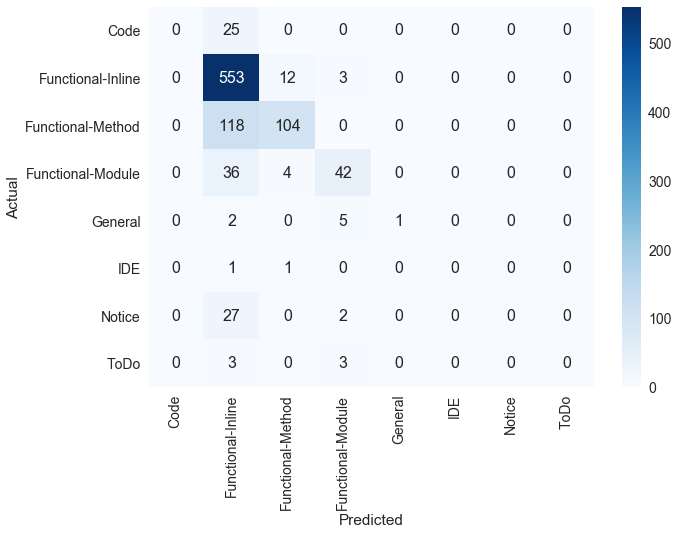

In [337]:
plot_confusion_matrix(y_test, y_pred)

In [319]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=np.unique(y_test)))

                   precision    recall  f1-score   support

             Code       0.86      0.27      0.41        22
Functional-Inline       0.60      0.69      0.64       100
Functional-Method       0.77      0.74      0.75       102
Functional-Module       0.81      0.96      0.88       211
          General       1.00      0.15      0.27        13
              IDE       1.00      0.14      0.25         7
           Notice       0.33      0.06      0.11        16
             ToDo       0.00      0.00      0.00         3

         accuracy                           0.75       474
        macro avg       0.67      0.38      0.41       474
     weighted avg       0.75      0.75      0.72       474



C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [335]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.7430997876857749


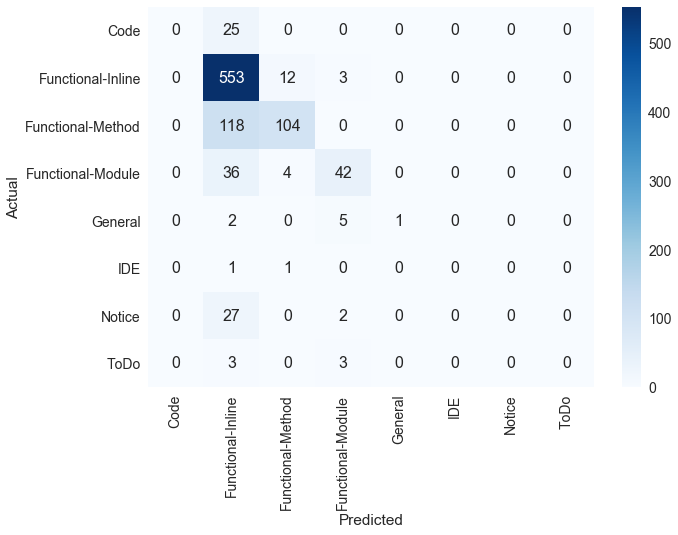

In [338]:
plot_confusion_matrix(y_test, y_pred)

In [339]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.7239915074309978


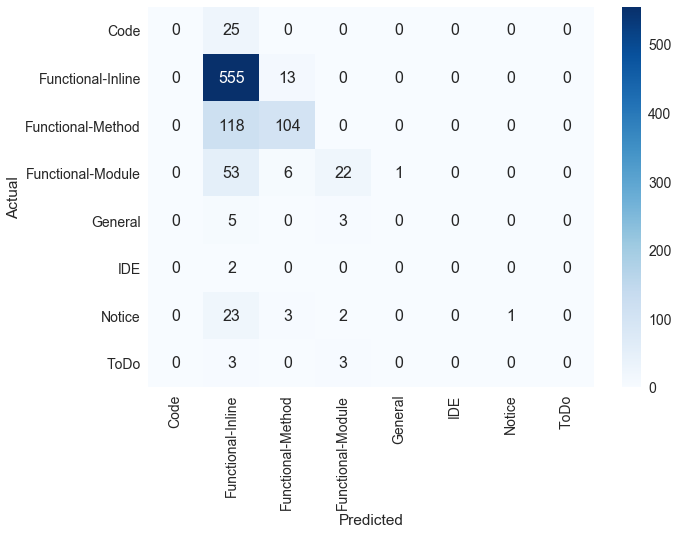

In [340]:
plot_confusion_matrix(y_test, y_pred)

In [254]:
vectorizer.vocabulary_

{'oznacavamo': 4284,
 'trenutni': 6833,
 'cvor': 874,
 'kao': 2542,
 'posecen': 4704,
 'print': 5162,
 'karaktera': 2548,
 'nije': 3706,
 'ok': 4044,
 'korisnik': 2868,
 'unosi': 7003,
 'broj': 522,
 'koji': 2666,
 'æe': 7634,
 'generirati': 1653,
 'matricu': 3212,
 'dvodimenzionalna': 1334,
 'matrica': 3209,
 'програм': 8158,
 'илуструје': 7840,
 'валидно': 7731,
 'препоручено': 8131,
 'именовање': 7844,
 'идентификатора': 7815,
 'javlja': 2444,
 'state': 6302,
 'mašini': 3222,
 'da': 883,
 'se': 5865,
 'desio': 1012,
 'događaj': 1211,
 'povlačenja': 4811,
 'miša': 3325,
 'updateuje': 7023,
 'link': 3043,
 'germview': 1673,
 'hanlemoving': 1849,
 'lastposition': 2987,
 'ako': 181,
 'je': 2451,
 'selektovan': 5890,
 'tacno': 6568,
 'jedan': 2452,
 'node': 3772,
 'arrayalg': 303,
 'pair': 4300,
 'zaposleni': 7529,
 'minmax': 3314,
 'ljudi': 3080,
 'inicijalizacija': 2083,
 'za': 7440,
 'treepopdiagram': 6823,
 'metoda': 3283,
 'koju': 2672,
 'implementiraju': 2023,
 'samo': 5816,
 'neki

In [334]:
for comm in df.loc[df['label'] == 'Notice']['comment']:
    print(comm)
    print('\n')

 http stackoverflow com questions 4087468 ssn regex for 123 45 6789 or xxx xx xxxx 


 pošto smo prvo proverili da li graf postoji ovaj exception nikad ne bi trebao da bude bačen 


 ovo nikad ne treba da bude izvrseno


 ovako ne treba raditi 


 metod integer parseint moze dovesti do izbacivanja runtimeexception izuzetka numberformatexception u slucaju da se u stringu ne nalazi ispravna string reprezentacija celog broja 


 primer 2 


 napomena 2 ako u programu postoje dve ili vise istovetnih string konstanti za njih se nece praviti zasebni objekti vec ce postojati samo jedan zbog toga za njih vraca true 


 prvi nacin metod valueof od promenljive koju prima kao argument vraca njenu stringovnu reprezentaciju radi za vecinu primitivnih tipova podataka nizove karaktera i objekte string valueof true se izracunava u true string valueof 5 5 se izracunava u 5 5 


 primer ilustruje jednostavnu primenu metoda split koji razbija string na niz podstringova a za razdvajanje koristi zadati str

In [328]:
df

,NaturalLanguageID,ProgrammingLanguageName,RepoID,SourceID,CommentID,comment,label
0,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,ispisujemo poruku da je drajver loadovan,Functional-Inline
1,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,ispis država za uneseni kontinent,Functional-Inline
2,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,slanje upute,Functional-Inline
3,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,ispis gradova koji pocinju odreðenim slovom,Functional-Inline
4,SR,Java,BILD-IT-Advanced-master,src\grupniProjekat_02_03_2016\SearchEngine.java,BILD-IT-Advanced-master/src\grupniProjekat_02_...,hvatalica grešaka,Functional-Inline
...,...,...,...,...,...,...,...
4705,SR,Java,RAUM-master,funkcija.java,RAUM-master/funkcija.java/294,sad je podfunkcija oblika funkcija broj,Functional-Inline
4706,SR,Java,SBZ-master,drools-spring-v2-app\src\main\java\drools\spri...,SBZ-master/drools-spring-v2-app\src\main\java\...,racun setoriginalnaukupnacena racundto getorig...,Code
4707,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,rečnik koji se koristi za normalizovanje čest...,Functional-Inline
4708,SR,Java,SCStemmers-master,src\weka\core\stemmers\MilosevicStemmer.java,SCStemmers-master/src\weka\core\stemmers\Milos...,očuvava kapitalizaciju na početku rečenice pr...,Functional-Inline
